# **Updating/Instaling Libraries**

In [ ]:
!pip install keras
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# **Importing Libraries**

In [ ]:
!pip install unidecode
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode # This line should now work as the module has been installed
import os
from time import time

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# **Loading Dataset**

In [ ]:
# Install imbalanced-learn if you don't have it
# !pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv("/content/drive/MyDrive/Bengali quotes database/all_quotes_cleaned.csv")  # Adjust the path

# Assuming you have 27 categories, but only a few samples for some categories
# For demonstration, we'll assume 'category_en' has only 'life' category so far
# You can adjust your actual categories in the 'category_en' column

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(df[['quotes']], df['category_en'])

# Convert the result back to a DataFrame
df = pd.DataFrame({'quotes': X_resampled['quotes'], 'category_en': y_resampled})

print(df['category_en'].value_counts())  # To check if the data is balanced now

# # Save the balanced dataset to a new CSV file
# df.to_csv('balanced_data.csv', index=False)


category_en
life             187
decision         187
money            187
depression       187
insul            187
city             187
examination      187
tension          187
dream            187
change           187
full_moon        187
democracy        187
atheist          187
soul             187
love             187
revenge          187
illness          187
law              187
conjugal_life    187
moments          187
sky              187
rain             187
relation         187
nature           187
success          187
frinedship       187
cloud            187
Name: count, dtype: int64


In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
print(df.value_counts())

quotes                                                                                                                                                              category_en
কষ্টের মেঘগুলো বৃষ্টি হয়ে ঝরে এই শহরে সবুজ পাতার হলুদবর্ণ দেয় যে নিমিষে সরিয়ে ।                                                                                     rain           17
গ্রামের বাদলা দিনের দিনগুলোয় চাল ভাজা আর নারকেল শহরের মানুষগুলো পায় না যে এর স্বাদ কেমন যেন সব বেআক্কেল….                                                           rain           15
তুমিহীন আজ আমি একা পথে হাটি পায়ের নিচে আজ খালি ভেজা মাটি ….                                                                                                         rain           15
রিমঝিম রিমঝিম এই বাদল দিনে তুমি ছাড়া কিছুতে কেন মন লাগে না ।। ঝিরঝির হাওয়া চঞ্চল মেঘে মন চায় মন চায় তোমাকে নিতে চিনে                                              rain           14
ঝুম বৃষ্টি যেন রিনিঝিনি নুপুরের ধ্বনি মন পাগল করা অপরূপ সৃষ্টি । উদাস হয়ে শুধুই তাকিয়ে থাকা ভেতর

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
# Define your feature (X) and target (y)
X = df['quotes']  # Replace 'text_column' with your actual text feature column
y = df['category_en']  # Replace 'label_column' with your actual target column

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train into a single DataFrame for the training set
df_train = pd.DataFrame({'quotes': X_train, 'category_en': y_train})

# Combine X_test and y_test into a single DataFrame for the test set
df_test = pd.DataFrame({'quotes': X_test, 'category_en': y_test})

# Check the shape of the split datasets
print(f"Train set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (4039, 2)
Test set shape: (1010, 2)


In [ ]:

df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
display(df_train)
df_train.head()
df_train.describe()
df_train.info()
print(df_train.category_en.unique())

,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",law,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",soul,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,life,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",frinedship,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,conjugal_life,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,sky,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",change,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",relation,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",frinedship,26


<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 3499 to 1180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       4039 non-null   object
 1   category_en  4039 non-null   object
 2   count        4039 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 126.2+ KB
['law' 'soul' 'life' 'frinedship' 'conjugal_life' 'revenge' 'relation'
 'examination' 'sky' 'love' 'depression' 'tension' 'atheist' 'decision'
 'moments' 'illness' 'insul' 'success' 'democracy' 'nature' 'dream' 'city'
 'full_moon' 'rain' 'change' 'cloud' 'money']


In [ ]:
display(df_test)
df_test.head()
df_test.describe()
df_test.info()

,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",sky,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,conjugal_life,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",full_moon,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,change,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,moments,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,soul,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,love,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,success,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",law,13


<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 618 to 3719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       1010 non-null   object
 1   category_en  1010 non-null   object
 2   count        1010 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 31.6+ KB


# **Stopwords Removal**

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/Bengali quotes database/stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [ ]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))


In [ ]:
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [ ]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

# **Changing Labels to Numbers**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the combined target data
label_encoder.fit(pd.concat([y_train, y_test]))

# Encode the labels in the training and test sets
df_train['category_en'] = label_encoder.transform(df_train['category_en'])
df_test['category_en'] = label_encoder.transform(df_test['category_en'])

# Check the results
display(df_train)
display(df_test)

# Optional: If you want to see the mapping between categories and their encoded labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category to Label Mapping:", category_mapping)


,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",14,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",24,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,15,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",10,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,4,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,23,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",1,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",21,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",10,26


,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",23,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,4,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",11,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,1,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,17,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,24,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,16,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,25,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",14,13


Category to Label Mapping: {'atheist': 0, 'change': 1, 'city': 2, 'cloud': 3, 'conjugal_life': 4, 'decision': 5, 'democracy': 6, 'depression': 7, 'dream': 8, 'examination': 9, 'frinedship': 10, 'full_moon': 11, 'illness': 12, 'insul': 13, 'law': 14, 'life': 15, 'love': 16, 'moments': 17, 'money': 18, 'nature': 19, 'rain': 20, 'relation': 21, 'revenge': 22, 'sky': 23, 'soul': 24, 'success': 25, 'tension': 26}


# **Removing Null values**

In [ ]:
#display non-null values
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [ ]:
#counting text length
df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>10]
df_test= df_test.loc[df_test['count']>10]

# **Shuffle Dataset**

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
display(df_train)
display(df_test)

,quotes,category_en,count
0,সৎ কর্ম মানুষকে দৃঢ় ও সাহসী করে। দেহ ও মনকে র...,12,21
1,একজন ধনী ব্যক্তি যদি টাকা সঠিকভাবে ব্যয় করতে ...,18,19
2,"মানুষের জীবনে টাকার চেয়ে সময় বেশি মূল্যবান, ...",18,29
3,দেশের প্রতি সব সময় অনুগত থাকো। কিন্তু সরকারের...,6,17
4,গণতান্ত্রিক পরিবেশে পুলিশের সামরিক নয় বেসামরি...,6,28
...,...,...,...
3383,"শহর হলো মানুষের চিড়িয়াখানা, এখানে সবুজ পরিবে...",2,20
3384,মন দীর্ঘকাল খারাপ থাকলে সেখানে অসুস্থতা জমে যা...,12,24
3385,উদাস হয়ে তাকিয়ে……..দেখি দুরে কেন রে বৃষ্টি পা...,20,23
3386,যদি আগামী কাল কিছু অর্জন করার জন্য আকাঙ্ক্ষা র...,8,16


,quotes,category_en,count
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,4,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",11,24
2493,গণতন্ত্রের সমস্ত খারাপ দিক বা অসুস্থতা দূর করা...,6,16
2250,"জীবন আমাকে যা কিছু দিয়ে যায়, আমি দুই হাত ভরে...",5,24
2369,"পতাকা উড়ছে মাথার উপর, স্বাধীন আমার দেশ। গণতন্...",6,96
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,24,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,16,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,25,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",14,13


In [ ]:
train_sentences=df_train['quotes'].values
train_labels=df_train['category_en'].values

In [ ]:
test_sentences=df_test['quotes'].values
test_labels=df_test['category_en'].values

In [ ]:
print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 3388
Testing Set Length: 838
train_labels shape: (3388,)
test_labels shape: (838,)


# **Train/Test/Validation Set**
**This dataset contains two csv files. One is Train set and another is Test set.IN EDA,we have seen that train and test set is equal sized and distribution of class is identical to both of the test and train set.
I have used full train set for training and used 20% of the data from testset for validation set and 80% for testing
The validation set and the Test set is partitioned into stratified fashion to keep the distribution of class intact.**

In [ ]:
test_sentences, validation_sentences,test_labels, validation_labels = train_test_split(test_sentences, test_labels,stratify=test_labels,test_size=0.2)

In [ ]:
train_labels=keras.utils.to_categorical(train_labels)
test_labels=keras.utils.to_categorical(test_labels)
validation_labels=keras.utils.to_categorical(validation_labels)


print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("training_sentences shape: "+str(train_sentences.shape))
print("testing_sentences shape: "+str(test_sentences.shape))
print("validation_sentences shape: "+str(validation_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("validation_labels shape: "+str(validation_labels.shape))

Training Set Length: 3388
Testing Set Length: 838
training_sentences shape: (3388,)
testing_sentences shape: (670,)
validation_sentences shape: (168,)
train_labels shape: (3388, 27)
test_labels shape: (670, 27)
validation_labels shape: (168, 27)


In [ ]:
print(train_sentences[1])
print(train_labels[0])

একজন ধনী ব্যক্তি যদি টাকা সঠিকভাবে ব্যয় করতে না জানে তবে সে একজন অর্থবিশিষ্ট গরীব ছাড়া আর কিছুই নয়।
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [ ]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

# **Tokenization**

In [ ]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


print(train_sentences.shape)
print(train_labels.shape)

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#464246 words in raw dataset
#463651 words in raw dataset after stopwords removal
#***** after stemming

print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

(3388,)
(3388, 27)
7202
Word index length:7202


# **After Tokenization Data visualization**

In [ ]:
print("Sentence :--> \n")
print(train_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

মানুষের জীবনে টাকার চেয়ে সময় বেশি মূল্যবান, কিন্তু অনেকেই এটা মেনে নেয় না। আপনি চাইলেই আরো টাকা উপার্জন করতে পারেন, কিন্তু আপনি কখনই সময় বেশি পরিমাণে পেতে পারবেন না।

Sentence Tokenized and Converted into Sequence :--> 

[58, 44, 375, 212, 35, 66, 1488, 17, 348, 151, 376, 392, 12, 51, 4586, 246, 111, 655, 11, 449, 17, 51, 656, 35, 66, 2030, 267, 420, 12]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

In [ ]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (3388, 200)
Padded shape(testing): (670, 200)


# **Bi-LSTM Model Creation**

**All hyperparameters are optimized**

In [ ]:
import tensorflow as tf
print(keras.__version__)


3.4.1


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Flatten

# Model definition
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_length,)))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
# l2 regularizer
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))

# Adam optimizer with specified parameters
adam = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

# Model summary and compilation
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 64)             │       6,400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 200, 32)             │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200, 16)             │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 27)                  │          86,427 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,497,323 (24.79 MB)

 Trainable params: 6,497,323 (24.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history=model.fit(padded,train_labels,epochs=4,batch_size=512,validation_data=( validation_padded,validation_labels),use_multiprocessing=True, workers=8)

In [ ]:
history = model.fit(
    padded,
    train_labels,
    epochs=40,
    batch_size=512,
    validation_data=(validation_padded, validation_labels)
)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.0349 - loss: 3.5002 - val_accuracy: 0.1369 - val_loss: 3.4833
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1080 - loss: 3.4772 - val_accuracy: 0.1429 - val_loss: 3.4671
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.1403 - loss: 3.4554 - val_accuracy: 0.1250 - val_loss: 3.4459
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 977ms/step - accuracy: 0.1502 - loss: 3.4314 - val_accuracy: 0.1726 - val_loss: 3.4174
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 589ms/step - accuracy: 0.2134 - loss: 3.3980 - val_accuracy: 0.2202 - val_loss: 3.3769
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2528 - loss: 3.3444 - val_accuracy: 0.2679 - val_loss: 3.3149
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 586ms/step - accuracy: 0.3087 - loss: 3.2674 - val_accuracy: 0.3810 - val_loss: 3.2208
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3967 - loss: 3.1499 - val_accuracy: 0.3869 - val_loss: 3.0835
Ep

# **Learning Curve**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


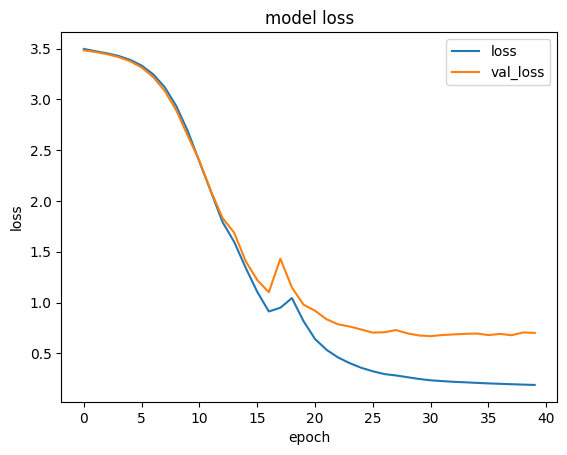

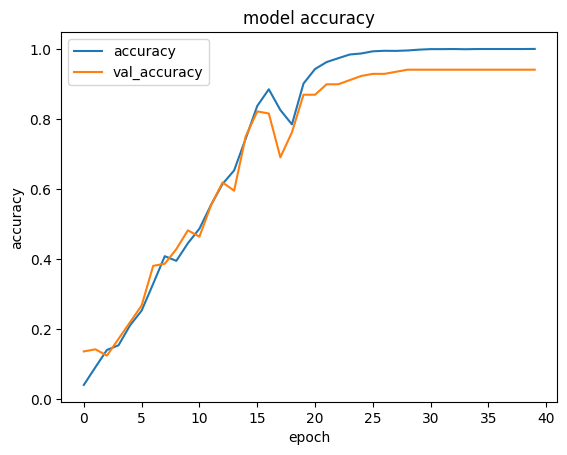

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


# **Evaluation**

In [ ]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=512)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=512)
print("The test accuracy is: "+str(loss_and_metrics[1]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 0.1864
The train accuracy is: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9459 - loss: 0.6295
The test accuracy is: 0.9462686777114868


In [ ]:
predictions = model.predict(testing_padded)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
predictions = np.argmax(predictions, axis=-1)

In [ ]:
test_labels=np.argmax(test_labels, axis=-1)

In [ ]:
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,predictions, average='weighted')
print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

Precision :0.9492830130684962
Recall :0.9462686567164179
fscore :0.943468421342307


# **Confusion Matrix & Classification Report**

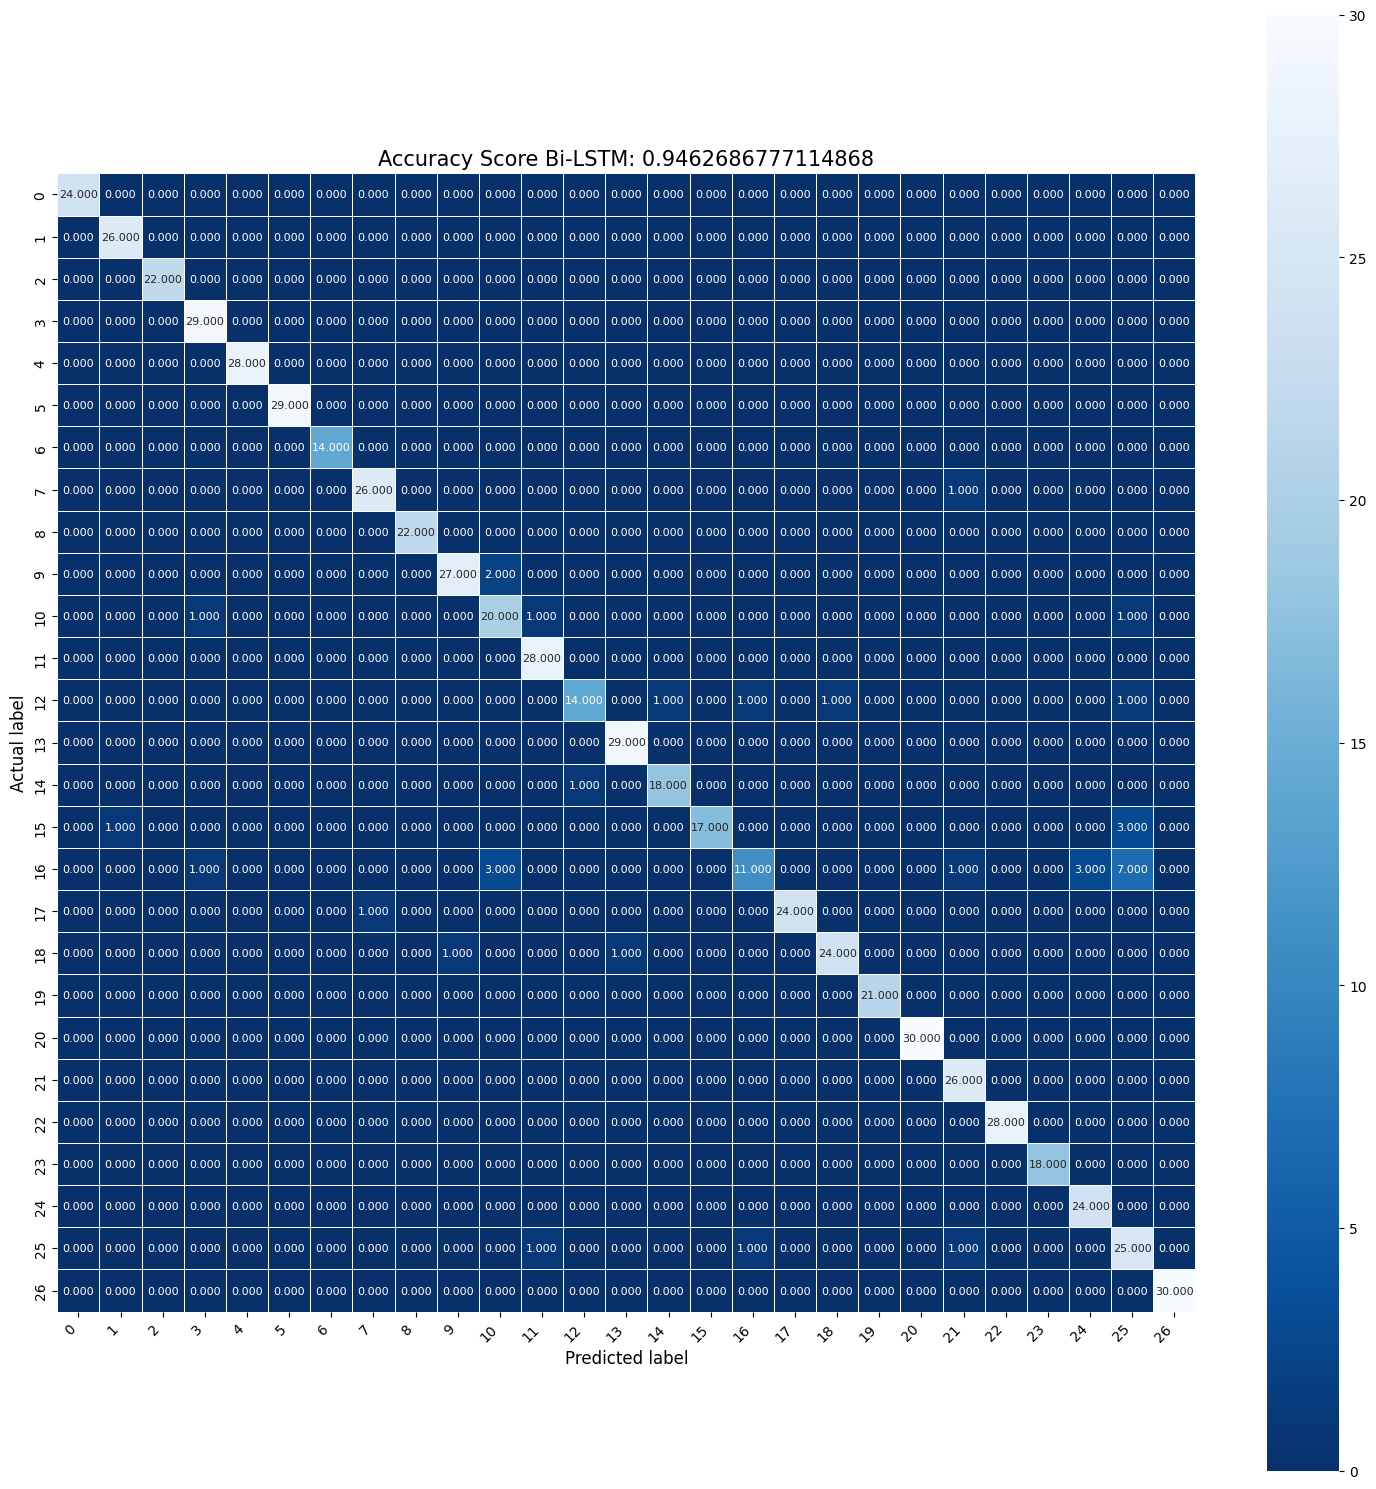

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming you have already calculated cm and loss_and_metrics
cm = metrics.confusion_matrix(test_labels, predictions)

# Adjust figure size to accommodate 27 levels
plt.figure(figsize=(15, 15))

# Create the heatmap with smaller annotation font size and clearer separation
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r',
            annot_kws={"size": 8})  # Adjust annotation font size

# Add labels with rotation for clarity
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add the title with a larger font size
all_sample_title = 'Accuracy Score Bi-LSTM: {0}'.format(loss_and_metrics[1])
plt.title(all_sample_title, size=15)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



In [ ]:
report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = predictions, output_dict=True)).transpose()
# report = report.rename(index={'0': 'economy','1':'sports','2':'international','3':'state','4':'technology','5':'entertainment','6':'education'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

,precision,recall,f1-score,support
0,100.00,100.00,100.00,24.000000
1,96.30,100.00,98.11,26.000000
2,100.00,100.00,100.00,22.000000
3,93.55,100.00,96.67,29.000000
4,100.00,100.00,100.00,28.000000
5,100.00,100.00,100.00,29.000000
6,100.00,100.00,100.00,14.000000
7,96.30,96.30,96.30,27.000000
8,100.00,100.00,100.00,22.000000
9,96.43,93.10,94.74,29.000000
